In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from datetime import datetime

def parse_time(s):  #parse time str like "043846.022428"
    s=str(s)
    hour = int(s[0:2])
    minute = int(s[2:4])
    second = int(s[4:6])
    microsecond = int(s[7:13])
    #make a fake date for easier resampling later in this problem
    return datetime(year=2015, month=9, day=3, hour=hour, minute=minute, second=second, microsecond=microsecond)


In [3]:
columns=['time', 'stock', 'quote_trade', 'c4', 'c5', 'c6', 'c7']
# read in whole csv through pandas, much faster than read file line by line
data = pd.read_csv("sample.taq.csv", header=None, names=columns, dtype={'time':str, 'stock':str, 'quote_trade':str})

/Users/cong/.pyenv/versions/anaconda-2.1.0/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
data['time']=data['time'].map(parse_time) # parse the time info into python Time instance

In [5]:
q_JPM = data.loc[(data['stock']=='JPM') & (data['quote_trade']=='Q')]  # gather quote data for JPM stock\
#  and make a single dataframe

In [6]:
q_JPM = q_JPM.set_index('time')  #set index to be time
q_JPM.drop(['stock', 'quote_trade'], axis=1, inplace=True)   # drop useless stock and q/t
q_JPM.columns=['bid_price', 'ask_price', 'bid_size', 'ask_size']  # rename the columns
q_JPM.head()  # take a look

,bid_price,ask_price,bid_size,ask_size
time,,,,
2015-09-03 04:01:14.333994,57.88,58.7,500,200
2015-09-03 04:01:34.683981,57.88,58.7,1000,200
2015-09-03 04:01:35.239840,57.26,58.7,500,200
2015-09-03 04:01:35.240799,57.66,58.7,1000,200
2015-09-03 04:01:36.239031,57.87,58.7,100,200


In [7]:
q_JPM.shape

(1363962, 4)

In [8]:
t_JPM = data.loc[(data['stock']=='JPM') & (data['quote_trade']=='T')]  # gather trade data for JPM stock\

In [9]:
t_JPM = t_JPM.set_index('time')  #set index to be time
t_JPM.drop(['stock', 'quote_trade', 'c6', 'c7'], axis=1, inplace=True)   # drop useless stock, q/t and last two entries
t_JPM.columns=['trade_price', 'trade_size']  # rename the columns
t_JPM.head()  # take a look

,trade_price,trade_size
time,,
2015-09-03 04:38:46.022625,58.7,200
2015-09-03 04:39:23.051732,58.7,19
2015-09-03 06:45:21.047893,59,300
2015-09-03 08:30:41.375586,58.86,400
2015-09-03 08:30:43.587646,58.86,200


In [10]:
t_JPM.shape

(66171, 2)

In [11]:
# We will do the samething for stock WFC

q_WFC = data.loc[(data['stock']=='WFC') & (data['quote_trade']=='Q')]  # gather quote data for WFC stock\
q_WFC = q_WFC.set_index('time')  #set index to be time
q_WFC.drop(['stock', 'quote_trade'], axis=1, inplace=True)   # drop useless stock and q/t
q_WFC.columns=['bid_price', 'ask_price', 'bid_size', 'ask_size']  # rename the columns

t_WFC = data.loc[(data['stock']=='WFC') & (data['quote_trade']=='T')]  # gather trade data for JPM stock\
t_WFC = t_WFC.set_index('time')  #set index to be time
t_WFC.drop(['stock', 'quote_trade', 'c6', 'c7'], axis=1, inplace=True)   # drop useless stock, q/t and last two entries
t_WFC.columns=['trade_price', 'trade_size']  # rename the columns
# t_WFC.head()


In [12]:
# We will do the samething for stock NOV

q_NOV = data.loc[(data['stock']=='NOV') & (data['quote_trade']=='Q')]  # gather quote data for NOV stock\
q_NOV = q_NOV.set_index('time')  #set index to be time
q_NOV.drop(['stock', 'quote_trade'], axis=1, inplace=True)   # drop useless stock and q/t
q_NOV.columns=['bid_price', 'ask_price', 'bid_size', 'ask_size']  # rename the columns

t_NOV = data.loc[(data['stock']=='NOV') & (data['quote_trade']=='T')]  # gather trade data for JPM stock\
t_NOV = t_NOV.set_index('time')  #set index to be time
t_NOV.drop(['stock', 'quote_trade', 'c6', 'c7'], axis=1, inplace=True)   # drop useless stock, q/t and last two entries
t_NOV.columns=['trade_price', 'trade_size']  # rename the columns
# t_WFC.head()

In [13]:
# We will do the samething for  stock SLB

q_SLB = data.loc[(data['stock']=='SLB') & (data['quote_trade']=='Q')]  # gather quote data for SLB stock\
q_SLB = q_SLB.set_index('time')  #set index to be time
q_SLB.drop(['stock', 'quote_trade'], axis=1, inplace=True)   # drop useless stock and q/t
q_SLB.columns=['bid_price', 'ask_price', 'bid_size', 'ask_size']  # rename the columns

t_SLB = data.loc[(data['stock']=='SLB') & (data['quote_trade']=='T')]  # gather trade data for JPM stock\
t_SLB = t_SLB.set_index('time')  #set index to be time
t_SLB.drop(['stock', 'quote_trade', 'c6', 'c7'], axis=1, inplace=True)   # drop useless stock, q/t and last two entries
t_SLB.columns=['trade_price', 'trade_size']  # rename the columns
# t_WFC.head()

In [14]:
# make a dictionary, maybe useful later
q_data={'SLB':q_SLB, 'JPM':q_JPM, 'NOV':q_NOV, 'WFC':q_WFC}
t_data={'SLB':t_SLB, 'JPM':t_JPM, 'NOV':t_NOV, 'WFC':t_WFC}


## Determine bad points
  1. points with bad ticker or quote_trade info.
  2. good points should have prices and sizes as resonable numbers.
  3. good points should be between start_time and end_time of each day.

In [15]:
### Possible error in stock ticker or quote_trade?
stocks=['JPM', 'NOV', 'SLB', 'WFC']

q_size = sum([q_data[s].shape[0] for s in stocks])
t_size = sum([t_data[s].shape[0] for s in stocks])
print "total data points are: {}".format(data.shape[0])
print "total q/t points are: {}".format(q_size+t_size)

total data points are: 3140063
total q/t points are: 3140059


In [16]:
### OK, 4 points missing, find them

data.loc[(data['quote_trade']!='Q') & (data['quote_trade']!='T')]

,time,stock,quote_trade,c4,c5,c6,c7
3139595,2015-09-03 16:00:00,eod_pos,sym=JPM,pos=-300,tpnl=46.00,opnl=0.00,dest=MKT_NYSE
3139596,2015-09-03 16:00:00,eod_pos,sym=SLB,pos=16,tpnl=660.24,opnl=0.00,dest=MKT_NYSE
3139597,2015-09-03 16:00:00,eod_pos,sym=WFC,pos=0,tpnl=117.00,opnl=0.00,dest=MKT_NYSE
3139598,2015-09-03 16:00:00,eod_pos,sym=NOV,pos=0,tpnl=-39.00,opnl=0.00,dest=MKT_NYSE


In [17]:
### Second ,check if all prices and sizes are resonable numbers
for s in stocks:
	q_data[s].bid_price=q_data[s].bid_price.astype(np.float64)
	q_data[s].ask_price=q_data[s].ask_price.astype(np.float64)
	q_data[s].bid_size=q_data[s].bid_size.astype(np.int32)
	q_data[s].ask_size=q_data[s].ask_size.astype(np.int32)
	print "for quote data of stock: {}".format(s)
	print "quote time min: {}, max: {}".format(q_data[s].index.min(), q_data[s].index.max())
	print "stock bid price min: {}, max: {}".format(q_data[s].bid_price.min(), q_data[s].bid_price.max())
	print "stock ask price min: {}, max: {}".format(q_data[s].ask_price.min(), q_data[s].ask_price.max())
	print "stock bid size min: {}, max: {}".format(q_data[s].bid_size.min(), q_data[s].bid_size.max())
	print "stock ask size min: {}, max: {}".format(q_data[s].ask_size.min(), q_data[s].ask_size.max())
	print "=========================================================="
# q_data['JPM'].astype

for quote data of stock: JPM
quote time min: 2015-09-03 04:01:14.333994, max: 2015-09-03 16:09:59.984734
stock bid price min: 57.26, max: 59.5
stock ask price min: 58.62, max: 59.65
stock bid size min: 100, max: 58500
stock ask size min: 100, max: 61900
for quote data of stock: NOV
quote time min: 2015-09-03 04:02:24.983465, max: 2015-09-03 16:09:59.764242
stock bid price min: 78.82, max: 83.43
stock ask price min: 81.77, max: 87.0
stock bid size min: 100, max: 32400
stock ask size min: 100, max: 14400
for quote data of stock: SLB
quote time min: 2015-09-03 04:00:03.448829, max: 2015-09-03 16:05:07.988638
stock bid price min: 101.0, max: 111.97
stock ask price min: 109.87, max: 210.62
stock bid size min: 100, max: 36700
stock ask size min: 100, max: 55700
for quote data of stock: WFC
quote time min: 2015-09-03 04:04:26.256739, max: 2015-09-03 16:08:26.052538
stock bid price min: 50.96, max: 52.28
stock ask price min: 51.51, max: 53.2
stock bid size min: 100, max: 135200
stock ask size 

In [18]:
### Similarly we check trade data

for s in stocks:
	t_data[s].trade_price=t_data[s].trade_price.astype(np.float64)
	t_data[s].trade_size=t_data[s].trade_size.astype(np.int32)
	print "for trade data of stock: {}".format(s)
	print "quote time min: {}, max: {}".format(t_data[s].index.min(), t_data[s].index.max())
	print "stock trade price min: {}, max: {}".format(t_data[s].trade_price.min(), t_data[s].trade_price.max())
	print "stock trade size min: {}, max: {}".format(t_data[s].trade_size.min(), t_data[s].trade_size.max())
	print "=========================================================="

for trade data of stock: JPM
quote time min: 2015-09-03 04:38:46.022625, max: 2015-09-03 16:09:54.999706
stock trade price min: 58.61, max: 78.92
stock trade size min: 1, max: 648595
for trade data of stock: NOV
quote time min: 2015-09-03 08:00:01.738312, max: 2015-09-03 16:05:02.650930
stock trade price min: 81.73, max: 83.45
stock trade size min: 1, max: 390313
for trade data of stock: SLB
quote time min: 2015-09-03 08:58:52.264515, max: 2015-09-03 16:07:01.786167
stock trade price min: 109.86, max: 111.97
stock trade size min: 1, max: 657248
for trade data of stock: WFC
quote time min: 2015-09-03 07:29:27.557545, max: 2015-09-03 16:07:01.788307
stock trade price min: 9.83, max: 52.3
stock trade size min: 1, max: 688294


In [19]:
start_time = datetime(year=2015, month=9, day=3, hour=9, minute=30)
end_time = datetime(year=2015, month=9, day=3, hour=16, minute=0)

In [20]:
data.loc[data['time']<start_time]

,time,stock,quote_trade,c4,c5,c6,c7
0,2015-09-03 04:00:03.448829,SLB,Q,101,128.37,200,100
1,2015-09-03 04:00:03.448927,SLB,Q,110.96,128.37,100,100
2,2015-09-03 04:00:14.967413,SLB,Q,110.95,128.37,100,100
3,2015-09-03 04:00:14.974791,SLB,Q,110.96,128.37,100,100
4,2015-09-03 04:00:14.986969,SLB,Q,110.95,128.37,100,100
5,2015-09-03 04:00:14.995795,SLB,Q,110.96,128.37,100,100
6,2015-09-03 04:00:14.996803,SLB,Q,110.95,128.37,100,100
7,2015-09-03 04:00:15.546104,SLB,Q,101,128.37,200,100
8,2015-09-03 04:00:15.546228,SLB,Q,110.96,128.37,100,100
9,2015-09-03 04:00:15.549694,SLB,Q,101,128.37,200,100


In [21]:
data.loc[data['time']>end_time]

,time,stock,quote_trade,c4,c5,c6,c7
3139599,2015-09-03 16:00:00.001175,NOV,Q,81.76,81.77,32200,6900
3139600,2015-09-03 16:00:00.001378,NOV,Q,81.76,81.77,32200,6800
3139601,2015-09-03 16:00:00.001426,JPM,Q,58.90,58.91,57900,19200
3139602,2015-09-03 16:00:00.001853,WFC,Q,52.09,52.10,135200,8600
3139603,2015-09-03 16:00:00.002383,NOV,Q,81.76,81.77,32200,6700
3139604,2015-09-03 16:00:00.002454,NOV,Q,81.76,81.77,32200,6600
3139605,2015-09-03 16:00:00.003670,NOV,Q,81.76,81.77,32200,6500
3139606,2015-09-03 16:00:00.004533,NOV,Q,81.76,81.77,32000,6500
3139607,2015-09-03 16:00:00.005524,NOV,Q,81.76,81.77,31600,6500
3139608,2015-09-03 16:00:00.005701,JPM,Q,58.90,58.91,57800,19200


## P1 Summary of Clean Up
  1. 4 points with wrong tick and quote_trade info
  2. the numbers of prices and sizes seem to be resonable
  3. 1817 points are before start_time(09:30), 464 points are after end_time(04:00)

In [22]:
q_JPM = q_JPM.loc[(q_JPM.index<end_time)&(q_JPM.index>start_time)]
q_NOV = q_NOV.loc[(q_NOV.index<end_time)&(q_NOV.index>start_time)]
q_SLB = q_SLB.loc[(q_SLB.index<end_time)&(q_SLB.index>start_time)]
q_WFC = q_WFC.loc[(q_WFC.index<end_time)&(q_WFC.index>start_time)]


t_JPM = t_JPM.loc[(t_JPM.index<end_time)&(t_JPM.index>start_time)]
t_NOV = t_NOV.loc[(t_NOV.index<end_time)&(t_NOV.index>start_time)]
t_SLB = t_SLB.loc[(t_SLB.index<end_time)&(t_SLB.index>start_time)]
t_WFC = t_WFC.loc[(t_WFC.index<end_time)&(t_WFC.index>start_time)]


## P2. Autocorrelation of midprice to midprice return of each quote data per stock

There's no clear defination of return. I will define it as
$r_n = \frac{\Delta_{n} P }{P_n}$.

In [27]:
q_JPM.loc[:,'mid_price'] = (q_JPM['bid_price'] + q_JPM['ask_price'])/2  # calculate mid price
q_NOV.loc[:,'mid_price'] = (q_NOV['bid_price'] + q_NOV['ask_price'])/2
q_SLB.loc[:,'mid_price'] = (q_SLB['bid_price'] + q_SLB['ask_price'])/2
q_WFC.loc[:,'mid_price'] = (q_WFC['bid_price'] + q_WFC['ask_price'])/2

q_JPM.loc[:,'mid_return'] = q_JPM['mid_price'].diff()/q_JPM['mid_price']  # calculate mid price return
q_WFC.loc[:,'mid_return'] = q_WFC['mid_price'].diff()/q_WFC['mid_price']
q_NOV.loc[:,'mid_return'] = q_NOV['mid_price'].diff()/q_NOV['mid_price']
q_SLB.loc[:,'mid_return'] = q_SLB['mid_price'].diff()/q_SLB['mid_price']

In [28]:
q_JPM = q_JPM[1:]  # drop first line as there's no return defined
q_NOV = q_NOV[1:]
q_SLB = q_SLB[1:]
q_WFC = q_WFC[1:]

In [29]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# In principle we can use acf function from statsmodels to have a better estimation
# but it's time consuming. We will do something simplier

In [30]:
ac_q_JPM = q_JPM['mid_return'].autocorr(1)
ac_q_WFC = q_WFC['mid_return'].autocorr(1)
ac_q_NOV = q_NOV['mid_return'].autocorr(1)
ac_q_SLB = q_SLB['mid_return'].autocorr(1)

print "Autocorrelation of midprice to midprice return of each quote data per stock"
print "JPM: {}".format(ac_q_JPM)
print "WFC: {}".format(ac_q_WFC)
print "NOV: {}".format(ac_q_NOV)
print "SLB: {}".format(ac_q_SLB)

Autocorrelation of midprice to midprice return of each quote data per stock
JPM: -0.128635303638
WFC: 0.0565845994777
NOV: -0.0157847622494
SLB: -0.46706397118


## P3 Autocorrelation of trade to trade return of each trade per stock

I will use the same defination of return, and assume lag of autocorrelation to be 1.

In [31]:
t_JPM.loc[:,'trade_return'] = t_JPM['trade_price'].diff()/t_JPM['trade_price']
t_WFC.loc[:,'trade_return'] = t_WFC['trade_price'].diff()/t_WFC['trade_price']
t_NOV.loc[:,'trade_return'] = t_NOV['trade_price'].diff()/t_NOV['trade_price']
t_SLB.loc[:,'trade_return'] = t_SLB['trade_price'].diff()/t_SLB['trade_price']

/Users/cong/.pyenv/versions/anaconda-2.1.0/lib/python2.7/site-packages/pandas/core/indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [32]:
t_JPM = t_JPM[1:]  # drop first line as there's no return defined
t_NOV = t_NOV[1:]
t_SLB = t_SLB[1:]
t_WFC = t_WFC[1:]

In [33]:
ac_t_JPM = t_JPM['trade_return'].autocorr(1)
ac_t_WFC = t_WFC['trade_return'].autocorr(1)
ac_t_NOV = t_NOV['trade_return'].autocorr(1)
ac_t_SLB = t_SLB['trade_return'].autocorr(1)


In [34]:
print "Autocorrelation of trade to trade return of each trade data per stock"
print "JPM: {}".format(ac_t_JPM)
print "WFC: {}".format(ac_t_WFC)
print "NOV: {}".format(ac_t_NOV)
print "SLB: {}".format(ac_t_SLB)

Autocorrelation of trade to trade return of each trade data per stock
JPM: -0.479058984163
WFC: -0.183133652712
NOV: -0.341333485066
SLB: -0.319043003099


## P4 Compare two acf amplitudes.

Among the 4 stocks, JPM, WFC and SLB has higher autocorrelation amplitude of trade return. SLB has higher amplitude of quote return autocorrelation.

This can be explained as actual trades can influence markets especially of large size while quotes have less infulence on market. A large buy or sell will cause possible over buy or over sell in market and causes the trade return to be negative auto correlated.

## P5 Resampling and correlation matrix

Question doesn't specify it's trade return or quote return. Will do trade return.

In [35]:
min_JPM_price = t_JPM.trade_price.resample('1min', how='mean')
min_JPM_return = (min_JPM_price.diff()/min_JPM_price).ix[1:]

min_NOV_price = t_NOV.trade_price.resample('1min', how='mean')
min_NOV_return = (min_NOV_price.diff()/min_NOV_price).ix[1:]

min_SLB_price = t_SLB.trade_price.resample('1min', how='mean')
min_SLB_return = (min_SLB_price.diff()/min_SLB_price).ix[1:]

min_WFC_price = t_WFC.trade_price.resample('1min', how='mean')
min_WFC_return = (min_WFC_price.diff()/min_WFC_price).ix[1:]

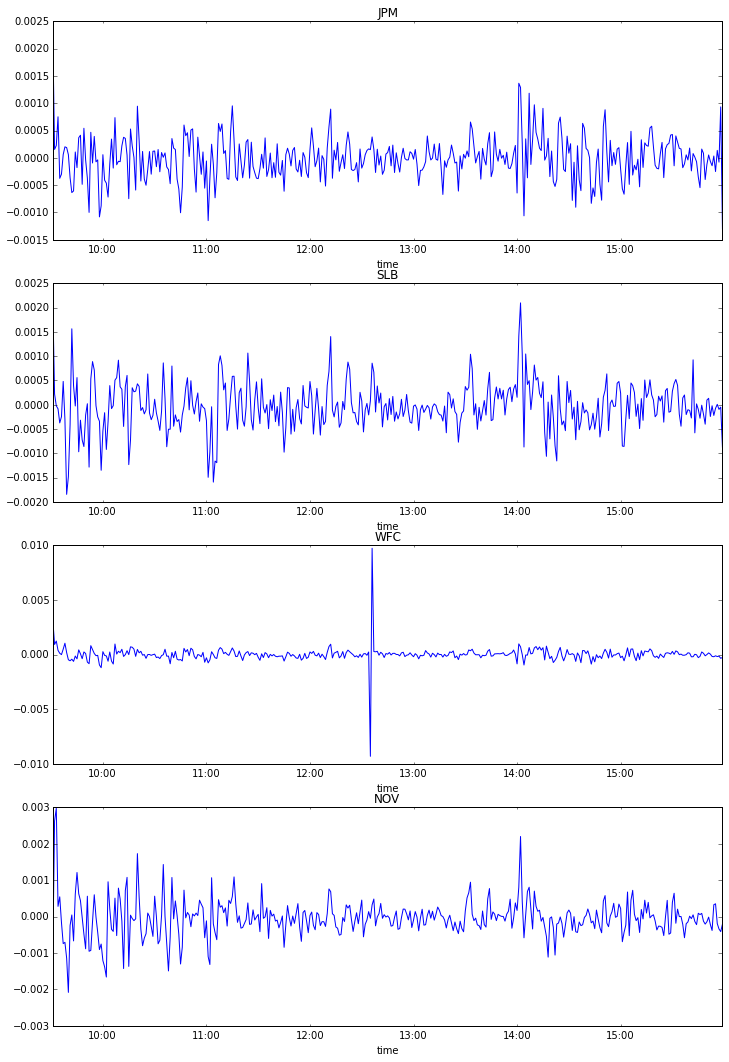

In [36]:
##  Make a plot, make sure we are not doing something stupid
fig = plt.figure(figsize=(12,18))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
min_JPM_return.plot(ax=ax1, title='JPM')
min_SLB_return.plot(ax=ax2, title='SLB')
min_WFC_return.plot(ax=ax3, title='WFC')
min_NOV_return.plot(ax=ax4, title='NOV')


In [37]:
# make a dataframe for easier calculation of correlation matrix
returns = pd.DataFrame({'JPM':min_JPM_return, 'SLB':min_SLB_return, 'WFC':min_WFC_return, 'NOV':min_NOV_return})

In [38]:
returns.corr()  # This is the correlation matrix

,JPM,NOV,SLB,WFC
JPM,1.000000,0.374971,0.569690,0.387678
NOV,0.374971,1.000000,0.531503,0.202244
SLB,0.569690,0.531503,1.000000,0.307873
WFC,0.387678,0.202244,0.307873,1.000000
